## Raman box geometry

The top of the Raman spectroscopy box has two disks, one set within the other. We write $r_1$ and $r_2$ for the distances from 1) the centre of the bigger disk to the centre of the smaller disk and 2) the centre of the smaller disk to the opening for Raman spectroscopy, and seek the orientations $\theta_1$ and $\theta_2$ required for the opening to be at a position $(x, y)$ relative to the centre of the bigger disk.

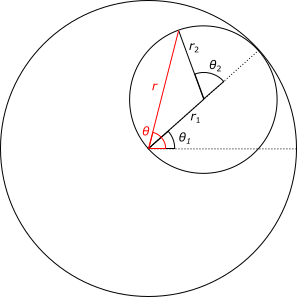

We let $r^2 = x^2 + y^2$ and $\theta = \arctan(y / x)$, and note by the cosine rule that $r^2 = r_1^2 + r_2^2 - 2 r_1 r_2 \cos(\pi - \theta_2)$. Consequently,
$$ \theta_2 = \arccos \left[\frac{r^2 - (r_1^2 + r_2^2)}{2 r_1 r_2} \right].$$
But by the sine rule, $\sin (\theta - \theta_1) / r_2 = \sin(\pi - \theta_2) / r$, so
$$ \theta_1 = \theta - \arcsin \left[\frac{r_2}{r} \sin \theta_2 \right].$$

In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

r1, r2 = 200, 200
rmax = r1 + r2

def position(angles):
    (th1, th2) = np.deg2rad(angles)
    x = r1 * np.cos(th1) + r2 * np.cos(th1 + th2)
    y = r1 * np.sin(th1) + r2 * np.sin(th1 + th2)
    return (x, y)

def angles(position):
    (x, y) = position
    r = np.sqrt(x**2 + y**2)
    if r > rmax:
        return (np.nan, np.nan)
    th = np.pi/2 * np.sign(y) if x == 0 else np.arctan2(y, x)
    th2 = np.arccos((r**2 - (r1**2 + r2**2)) / (2 * r1 * r2))
    D_th = np.pi if r == 0 else np.arcsin(r2 * np.sin(th2) / r)
    th1 = th - D_th
    return (np.rad2deg(th1), np.rad2deg(th2))

@interact(x = (-rmax, rmax), y = (-rmax, rmax))
def plot_solution(x, y):
    (deg1, deg2) = angles((x, y))
    pos = position((deg1, deg2))
    if np.isnan(deg1):
        print("Position unattainable")
    else:
        error = np.linalg.norm(np.array(pos) - np.array((x, y)))
        print(f"Large & small disk angles {deg1:.2f}\u00B0 and {deg2:.2f}\u00B0")
        print(f"Error {error:.1e} mm")
    th1, th2 = np.deg2rad(deg1), np.deg2rad(deg2)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_axes([0, 0, 1, 1], xlim=(-rmax, rmax), ylim=(-rmax, rmax))
    ax.plot(x, y, '+r',
            (0, r1 * np.cos(th1), pos[0]), (0, r1 * np.sin(th1), pos[1]), '-k')
    ax.add_patch(Circle((0, 0), radius = rmax, ec = 'k', fill = False))
    ax.add_patch(Circle((r1 * np.cos(th1), r1 * np.sin(th1)), radius = r2, ec = 'k', fill = False))
    plt.show()

interactive(children=(IntSlider(value=0, description='x', max=400, min=-400), IntSlider(value=0, description='…